In [15]:
# Cell to hide - just an option and import other functions

import pandas as pd
pd.set_option('display.max_columns', 27)

%run 1-functions.ipynb

__TODO: the whole thing__

More ideas
+ Try to predict with something that does not make sense (example: using ID attribute as a number)
+ or using Length as a category
+ mixing regression and classification

In [2]:
import pandas as pd

static_data = pd.read_csv('./static_data.csv')

MAE with Length: 2.73451052631579
MAE with Length and TripID: 3.8834960526315796
MAE with Length and MMSI: 4.936590789473684
MAE with Length, TripID and MMSI: 4.929193421052632
MAE with MMSI: 4.936590789473684
MAE with TripID: 7.796980263157895
Baseline: 7.859544829899586


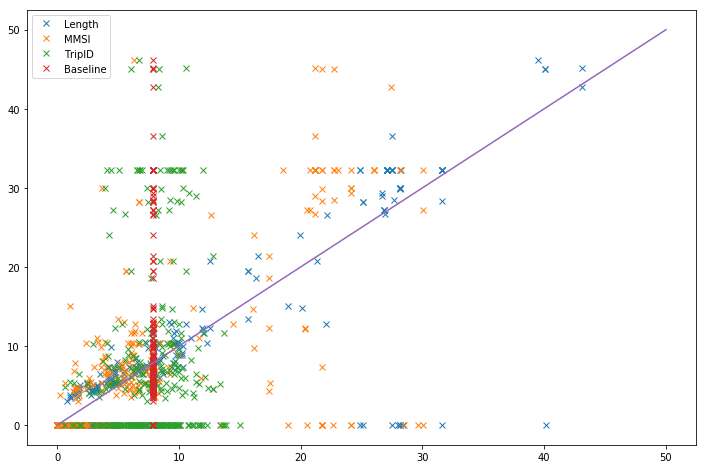

In [33]:
# Prediction of Width from Length or TripID

import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

plt.figure(figsize = (12, 8))

x = ['Length']
y = ['Width']
predictions, ytest = knn_regression(static_data, x, y)
print('MAE with Length: ' + str(mean_absolute_error(predictions, ytest)))

pred = []
for element in predictions:
    pred.append(element[0])
plt.plot(pred, ytest, 'x', label = 'Length')

x = ['Length', 'TripID']
y = ['Width']
predictions, ytest = knn_regression(static_data, x, y)
print('MAE with Length and TripID: ' + str(mean_absolute_error(predictions, ytest)))

x = ['Length', 'MMSI']
y = ['Width']
predictions, ytest = knn_regression(static_data, x, y)
print('MAE with Length and MMSI: ' + str(mean_absolute_error(predictions, ytest)))

#pred = []
#for element in predictions:
#    pred.append(element[0])
#plt.plot(pred, ytest, 'x', label = 'Length + MMSI')

x = ['Length', 'TripID', 'MMSI']
y = ['Width']
predictions, ytest = knn_regression(static_data, x, y)
print('MAE with Length, TripID and MMSI: ' + str(mean_absolute_error(predictions, ytest)))

#pred = []
#for element in predictions:
#    pred.append(element[0])
#plt.plot(pred, ytest, 'x', label = 'Length + TripID + MMSI')

x = ['MMSI']
y = ['Width']
predictions, ytest = knn_regression(static_data, x, y)
print('MAE with MMSI: ' + str(mean_absolute_error(predictions, ytest)))

pred = []
for element in predictions:
    pred.append(element[0])
plt.plot(pred, ytest, 'x', label = 'MMSI')

x = ['TripID']
y = ['Width']
predictions, ytest = knn_regression(static_data, x, y)
print('MAE with TripID: ' + str(mean_absolute_error(predictions, ytest)))

pred = []
for element in predictions:
    pred.append(element[0])
plt.plot(pred, ytest, 'x', label = 'TripID')

predictions, ytest = baseline_reg(static_data, x, y)
print('Baseline: ' + str(mean_absolute_error(predictions, ytest)))

pred = []
for element in predictions:
    pred.append(element[0])
plt.plot(pred, ytest, 'x', label = 'Baseline')

x = np.linspace(0, 50, 50)
plt.plot(x, x)

plt.legend()

In [45]:
# For beginner version: cell to hide

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error
import ipywidgets as widgets
from ipywidgets import interact

attributes = []
attributes.append('')
for att in static_data.select_dtypes([np.number]).columns:
    attributes.append(att)

def plot_pred(att1, att2, att3, att4, att5):
    
    plt.figure(figsize = (12, 8))
    
    x = []
    title = 'Prediction of Width from '
    for att in [att1, att2, att3, att4, att5]:
        if att != '':
            x.append(att)
            title = title + str(att) + ' '
            
    y = ['Width']

    predictions, ytest = knn_regression(static_data, x, y)
    print('MAE: ' + str(mean_absolute_error(predictions, ytest)))
    
    pred = []
    for element in predictions:
        pred.append(element[0])
    plt.plot(pred, ytest, 'x')
            
    x = np.linspace(0, 50, 50)
    plt.plot(x, x)
    
    plt.xlabel('Prediction')
    plt.ylabel('True label')
    plt.title(title)

interact(plot_pred,
         att1 = widgets.Dropdown(options = attributes,
                                 value = attributes[1],
                                 description = 'Att 1:',
                                 disabled = False,),
        att2 = widgets.Dropdown(options = attributes,
                                 value = '',
                                 description = 'Att 2 (opt):',
                                 disabled = False,),
        att3 = widgets.Dropdown(options = attributes,
                                 value = '',
                                 description = 'Att 3 (opt):',
                                 disabled = False,),
        att4 = widgets.Dropdown(options = attributes,
                                 value = '',
                                 description = 'Att 4 (opt):',
                                 disabled = False,),
        att5 = widgets.Dropdown(options = attributes,
                                 value = '',
                                 description = 'Att 5 (opt):',
                                 disabled = False,))

interactive(children=(Dropdown(description='Att 1:', index=1, options=('', 'TripID', 'MMSI', 'MeanSOG', 'Vesse…

<function __main__.plot_pred(att1, att2, att3, att4, att5)>

MAE with regression: 2.0717238095238097
Accuracy with classification: 0.38095238095238093


C:\Users\Anna\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


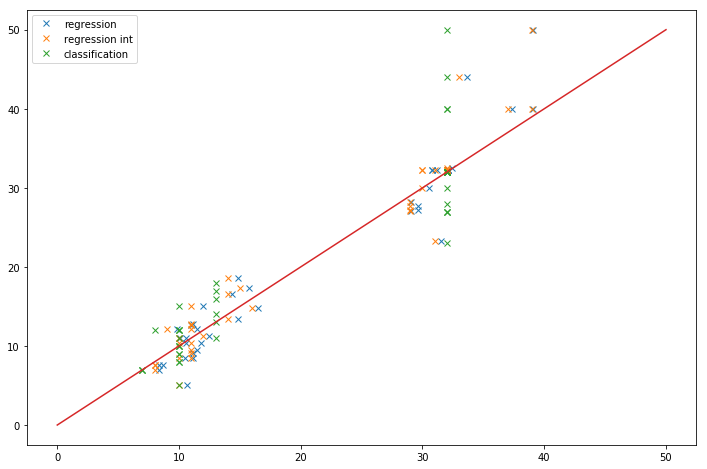

In [30]:
# Prediction of Width from Length: comparison regression and classification

import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error

x = ['Length']
y = ['Width']

plt.figure(figsize = (12, 8))

df = static_data.copy()
df = df.dropna()

predictions, ytest = knn_regression(df, x, y)
print('MAE with regression: ' + str(mean_absolute_error(predictions, ytest)))
pred = []
for element in predictions:
    pred.append(element[0])
plt.plot(pred, ytest, 'x', label = 'regression')
pred = []
for element in predictions:
    pred.append(int(element[0]))
yt = []
for element in ytest['Width']:
    yt.append(int(element))
plt.plot(pred, ytest, 'x', label = 'regression int')

df2 = static_data.copy()
df2 = df2.dropna()
df2['Width'] = df2['Width'].astype('int')
df2['Width'] = df2['Width'].astype('category')

predictions, ytest = knn_classification(df2, x, y)
print('Accuracy with classification: ' + str(accuracy_score(predictions, ytest)))
plt.plot(predictions, ytest, 'x', label = 'classification')

x = np.linspace(0, 50, 50)
plt.plot(x, x)

plt.legend()